<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb interactive_gstar_function.do.txt --encoding=utf-8 --ipynb_admon=hrule --ipynb_disable_mpl_inline --ipynb_cite=latex-plain -->

# Sensitivity indices for Sobol's $G^{*}$ function

**Leif Rune Hellevik**

Run the first cell to initialise plotting and printing modules for later use (and some system settings).

In [1]:
# ipython magic
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os, sys, inspect
# Use this if you want to include modules from a subfolder
cmd_subfolder = os.path.join(os.getcwd(), "python_source")
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)


%run python_source/matplotlib_header

# Sobol's $G^{*}$ function
<span id="sec:G_functions"></span>

In our previous notebook [g_function](interactive_g_function.ipynb),
we demonstrated how polynomial chaos expansions (with `chaospy`) may
be used for approximation of the Sobol sensitivity indices. The
example was Sobol's G function and was taken from [[1]](#saltelli2010) which is available [online](https://www.sciencedirect.com/science/article/pii/S0010465509003087) too. 

In this notebook we focus on another function, 
which has proved to be usefull as a test function with analytical
solutions for the sensitivity indicies, namely Sobol's $G^*$ function which
is defined much in the same manner as the
[g_function](interactive_g_function.ipynb):

<!-- Equation labels as ordinary links -->
<div id="eq:1"></div>

$$
\begin{equation}
Y=G(X) =  G(X_1, X_2,\ldots,X_k,a_1, a_2,\ldots,a_k)  = \prod_{i=1}^{k} g_i \label{eq:1} \tag{1}
\end{equation}
$$

which is identical with

<!-- Equation labels as ordinary links -->
<div id="eq:2"></div>

$$
\begin{equation}
g_i = \frac{(1+\alpha_i) |2 \left (X_i+ \delta_i - I(X_i+\delta_i) \right ) -1 |^{\alpha_i}+a_i}{1+{a}_i} \label{eq:2} \tag{2}
\end{equation}
$$

and all the input factors $X_i$ are assumed to be uniformly
distributed in the interval $[0,1]$, an the coefficients $a_i$ are
assumed to be positive real numbers $(a_i \leq 0)$, $\delta_i \in
[0,1]$, and $\alpha_i >0$. Finally, $ I(X_i+\delta_i)$ denotes the
integer value for $X_i+\delta_i$. Note that for for $\alpha_i=1$ and
$\delta_i=0$ $g^*$ reduces to $g$ in the
[g_function](interactive_g_function.ipynb) notebook. The $\alpha_i$
and $\delta_i$ are curvature and shift parameters, respectively.

The number of factors *k* can be varied as the reader pleases, but the
minimum number to produce a meaningful inference is set at three.

As you will be able to explore below, the sensitivity $S_i$ of $G$ in
([1](#eq:1)) with respect to a specific input factor $X_i$, will depend
on the value of the corresponding coefficient $a_i$; small values of
$a_i$ (e.g. $a_i=0$) will yield a high corresponding $S_i$, meaning
that $X_i$ is an important/influential variable on the variance or
uncertainty of $G$.

We have implemented Sobol's  $G^*$ function in ([1](#eq:1)) and  ([2](#eq:2)) in the code snippet below:

In [2]:
# Gstar-statistics

# import modules
import numpy as np

def Vi(ai,alphai):
    return alphai**2/((1+2*alphai)*(1+ai)**2)

def V(a_prms,alpha):
    D=1
    for ai,alphai in zip(a_prms,alpha):
        D*=(1+Vi(ai,alphai))     
    return D-1


def S_i(a,alpha):
    S_i=np.zeros_like(a)
    for i, (ai,alphai) in enumerate(zip(a,alpha)):
        S_i[i]=Vi(ai,alphai)/V(a,alpha)
    return S_i

def S_T(a,alpha):
    # to be completed
    S_T=np.zeros_like(a)
    Vtot=V(a,alpha)
    for i, (ai,alphai) in enumerate(zip(a,alpha)):
        S_T[i]=(Vtot+1)/(Vi(ai,alphai)+1)*Vi(ai,alphai)/Vtot
    return S_T

The sensitivity indices $S_i$ and $S_{Ti}$ for $Y=G(X)$ in
eq. ([1](#eq:1)) may be derived as outlined in [[1]](#saltelli2010)
(or [online](https://www.sciencedirect.com/science/article/pii/S0010465509003087)).

The conditional variance $V_i$ may be found to be:

<!-- Equation labels as ordinary links -->
<div id="eq:3"></div>

$$
\begin{equation}
V_i \left ( G^*(X_i,a_i,\alpha_i) \right) = \frac{\alpha_i^2}{(1+2\alpha_i)(1+a_i)^2}
\label{eq:3} \tag{3}
\end{equation}
$$

while the $V_{T_I}$ and the variance $V$ are given by the same
expressions as for the [g_function](interactive_g_function.ipynb).

<!-- Equation labels as ordinary links -->
<div id="eq:4"></div>

$$
\begin{equation}
V_{T_i} = V_i \; \prod_{j\neq i} (1+V_j) \qquad \text{and} \qquad V = \prod_{i=1}^k (1+V_i) -1
\label{eq:4} \tag{4}
\end{equation}
$$

Consequently the first order sensitivity indices $S_i$ of $Y=G(X)$, are given by

<!-- Equation labels as ordinary links -->
<div id="eq:5"></div>

$$
\begin{equation}
S_i=\frac{V_i}{V} \qquad \text{and} \qquad S_{T_i}=\frac{V_{T_i}}{V}
\label{eq:5} \tag{5}
\end{equation}
$$

<!-- The expressions for the variance obtained when keeping one parameter -->
<!-- fixed and varying all the others can be found below alow with the -->
<!-- expression for the total variance.  The Sensitivity indices -->
<!-- expressions can be easily retrieved from these. -->

<!-- In the code snippet below alow you to experiment interactively to so -->
<!-- how the values of $a_i$ affect the correspoding $S_i$, i.e the -->
<!-- sensitivity of $G$ with respect to $X_i$. -->

Output()

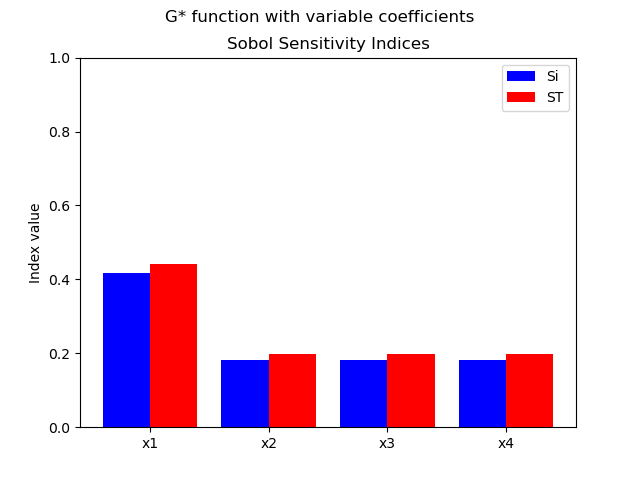

In [3]:
# Interactive plotting
from slider_helpers import build_slider_interface
from slider_helpers import make_slider_dict
from ipywidgets import FloatSlider
from plotting import plot_sobol_indices


f, ax = plt.subplots(1,1)
f.suptitle('G* function with variable coefficients')


def model(**kwargs):
    Nk = len(kwargs) // 3

    a = [kwargs[f'a{i}'] for i in range(1, Nk + 1)]
    alpha = [kwargs[f'alpha{i}'] for i in range(1, Nk + 1)]
    delta = [kwargs[f'delta{i}'] for i in range(1, Nk + 1)]

    Si = S_i(a, alpha)
    ST = S_T(a, alpha)

    plot_sobol_indices(Si, ST, ax)

    
prm_strn=['a', 'alpha', 'delta'];
nk=4
slider_dict = make_slider_dict(prm_strn, nk)

build_slider_interface(slider_dict, model, sliders_per_row=nk)

# End interactive plotting

Use the sliders to see how the sensitivities vary with the values of $a_i$, and reflect on the effect. 

Note from the analytical expressions $V_i$ and $V_{T_i}$ (derived in
[[1]](#saltelli2010)) in the sensitivity indices do not depend on the
shift paramters $\delta_i$.

For $\alpha_i<1$ the $G^*$ function is concave, while the function is
convex for $\alpha_i>1$, which is the reason for calling $\alpha$ a
shape parameter.

## Approximation of the sensitivity indices for Sobol's $G^*$ function with spectral expansions

In this section we show the spectral expansion module [chaospy](https://github.com/jonathf/chaospy) may be used to compute the Sobol
indices for Sobol's $G^*$ function.  A more in depth treatment of
`chaospy` and its usage is provided in the separate notebook [A
practical introduction to polynomial chaos with the chaospy package](introduction_gpc.ipynb). Furthermore, you may find our previous "A
Guide to Uncertainty Quantification and Sensitivity Analysis for
Cardiovascular Applications" [[2]](#eck2015guide) as a useful
introduction to how polynomial chaos expansions may be used for
UQ&S. We are therefore focusing on the application of the spectral
expansions and how they agree with the analytical solutions for the
indices, rather than presenting the spectral expansion theory.

<!-- @@@CODE ./python_source/chaospy_gstar_function.py fromto:# chaospy G-function with sliders@# End chaospy G-function with sliders -->

You may check whether approximated sensitivity indices are independent of the
shift paramters $\delta_i$, as they should according according to the analytical expressions for $V_i$ in eq. ([3](#eq:3)).

## Comparison of MC and PC approximation of the sensitivity indices

In this section we demonstrate how Monte Carlo simulations and
Polynomial Chaos expansions both may be used to estimate the Sobol
indices and compare their estimates with the analytical solutions.

<!-- @@@CODE ./python_source/cp_mc_gstar_function.py fromto:# mc and pc comparison for Gstar-function with sliders@# end mc and pc comparison for Gstar-function with sliders -->

# References

<!-- BIBFILE: ./references/papers.pub -->